Generating an image...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/Users/sueszli/.asdf/installs/python/3.11.9/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

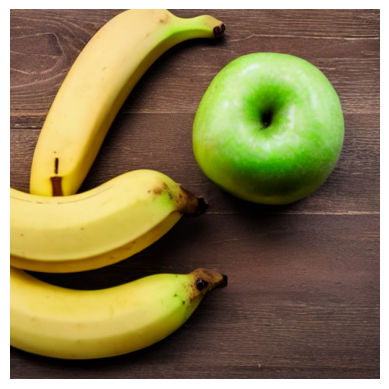

Captioning the image...


/Users/sueszli/.asdf/installs/python/3.11.9/lib/python3.11/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


text_queries: ['fruit']
Classifying the image...


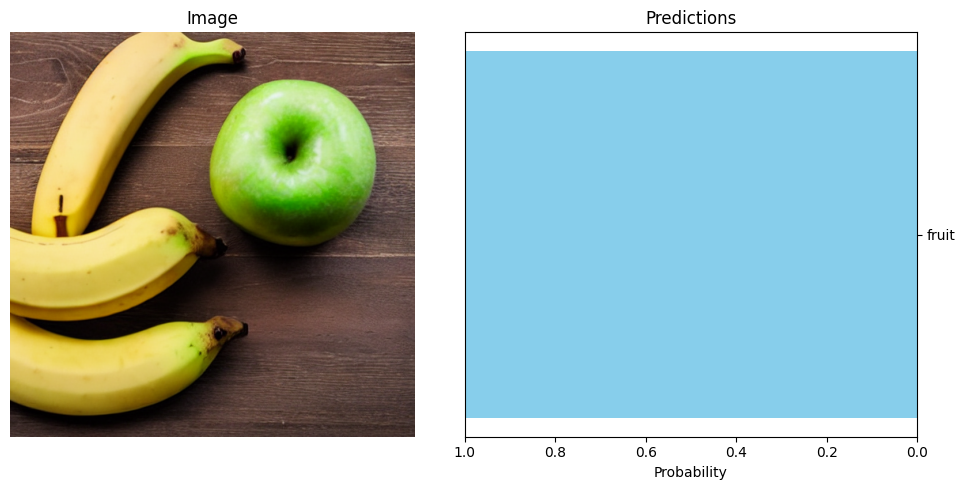

Detecting objects in the image...
Segmenting objects in the image...


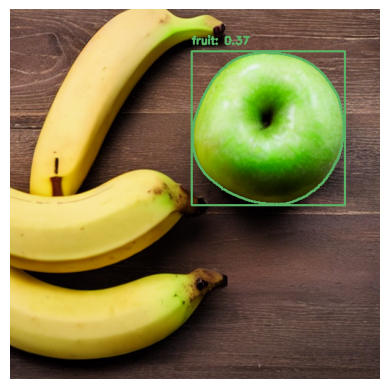

In [2]:
from matplotlib import pyplot as plt
from models.utils import set_seed
from models.generation import gen_stable_diffusion
from models.cls import classify_clip, plot_classification
from models.det import detect_groundingdino
from models.seg import segment_sam1, plot_segmentation_detection
from models.caption import caption_vqa


set_seed(42)

GREEN = "\033[92m"
RESET = "\033[0m"

# 1. generate an image
print(f"{GREEN}Generating an image...{RESET}")
img = gen_stable_diffusion("an apple and a banana on a table")
plt.imshow(img)
plt.axis('off')
plt.show()

# 2. caption it
print(f"{GREEN}Captioning the image...{RESET}")
text_queries = caption_vqa(img)
print("text_queries:", text_queries)

# 3. classify, detect, segment it
print(f"{GREEN}Classifying the image...{RESET}")
probs = classify_clip(img, text_queries)
plot_classification(img, text_queries, probs)

print(f"{GREEN}Detecting objects in the image...{RESET}")
threshold = 0.1
boxes, scores, labels = detect_groundingdino(img, text_queries, threshold)

print(f"{GREEN}Segmenting objects in the image...{RESET}")
masks = segment_sam1(img, boxes)
plot_segmentation_detection(img, boxes, scores, text_queries, masks)
